In [51]:
from gas_turbine_cycle.gases import Air
import numpy as np
import pickle
from gas_turbine_cycle.core.turbine_lib import CombustionChamber, Load
from compressor.average_streamline.compressor import Compressor
from comb_chamber.geom import CombustionChamberGeom
import config
import os

In [52]:
with open(os.path.join(config.output_dirname, config.cycle_results), 'rb') as f:
    comb_chamber: CombustionChamber = pickle.load(f)[0]['comb_chamber']

with open(os.path.join(config.output_dirname, config.cycle_results), 'rb') as f:
    turb_load: Load = pickle.load(f)[0]['turb_load']
        
with open(os.path.join(config.output_dirname, 'compressor.comp'), 'rb') as f:
    compressor: Compressor = pickle.load(f)[0]


# Исходные данные

In [68]:
G_air = turb_load.power / turb_load.consumable_labour
G_fuel = comb_chamber.g_fuel_prime * comb_chamber.g_in * G_air

comb_chamber_geom = CombustionChamberGeom(work_fluid_in=Air(), 
                                          Q_n=comb_chamber.Q_n, 
                                          sigma_d=0.997, sigma_front=0.996, 
                                          n_pipe=12, 
                                          G_in=G_air, 
                                          p_stag_in=comb_chamber.p_stag_in, T_stag_in=comb_chamber.T_stag_in, 
                                          F_in=compressor.last.geom.F3, D_d_av=compressor.last.geom.D3_av, 
                                          G_fuel_in=0, 
                                          G_fuel=G_fuel, 
                                          alpha_sum=comb_chamber.alpha_out, 
                                          alpha1=0.6, 
                                          c_d=24, c1=12, H=3.5e6, l1_rel=0.6, 
                                          eta_burn=comb_chamber.eta_burn)

In [69]:
comb_chamber_geom.compute()

# Результаты расчета

## Значения геометрических параметров

1. Наружний диаметр на выходе из диффузора $D_{д\ пер} = $ {{ str(round(comb_chamber_geom.diffuser.D_out_per, 4)*1e3) }} мм.
2. Внутренний диаметр на выходе из диффузора $D_{д\ вт} = $ {{ str(round(comb_chamber_geom.diffuser.D_out_hub, 4)*1e3) }} мм.
3. Диаметр жаровой трубы $d_ж = $ {{ str(round(comb_chamber_geom.d_pipe, 3)*1e3) }} мм.
4. Длина жаровой трубы $l_ж = $ {{ str(round(comb_chamber_geom.l_pipe, 3)*1e3) }} мм.
5. Длина зоны горения $l_I = $ {{ str(round(comb_chamber_geom.l1, 3)*1e3) }} мм.

## Изображение жаровых труб в кольцевом канале

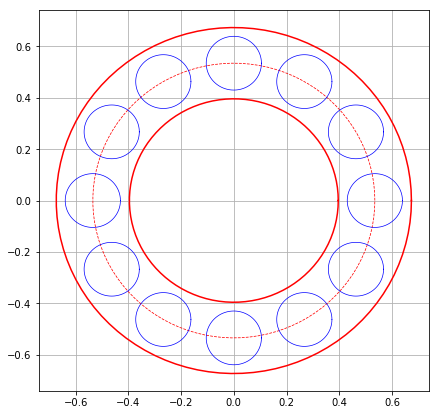

In [70]:
comb_chamber_geom.plot(figsize=(7, 7))

# Сохранение результатов

In [72]:
with open(os.path.join(config.output_dirname,  'comb_chamber_geom.cchg'), 'wb') as f:
    pickle.dump(comb_chamber_geom, f)